In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm

In [100]:
beta = .1
sigma = 3
T = 20
Nt = 1000
Nx = 5000
t = np.linspace(0, T, Nt)
x = np.linspace(-20,20,Nx)
X,T = np.meshgrid(x,t)
dx = x[1] - x[0]; dt = t[1] - t[0]
ic = np.exp(-beta*x**2)*np.sqrt(beta/np.pi)
M = scipy.integrate.trapz(ic, x)
u = np.zeros((Nx, Nt))
u[:,0] = ic

def transport_step_periodic_BC(u,j):
    v = u[:,j]**sigma
    dudt = np.zeros_like(u[1:,0])
    for i in range(1, Nx):
        dudt[i-1] = v[i]-v[i-1]
        
    u[1:, j+1] = u[1:,j] - dt/dx*dudt
    

    
    #periodic BCs
    u[0,j+1] = u[-1,j+1] 
    
    #fix attenuation

    
    #u[:,j+1] = M/M_prime*u[:,j+1]
    return u

In [101]:
for j in range(Nt-1):
    u = transport_step_periodic_BC(u,j)

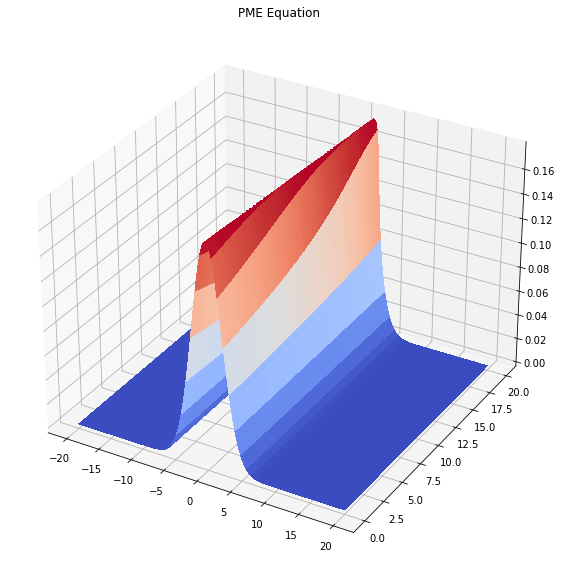

In [102]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('Nonlinear transport Equation')
plt.show()

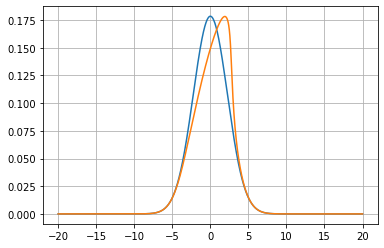

In [103]:
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.grid()

## Transport + PME


In [159]:
beta = 1
sigma1 = 1
sigma2 = 1
T = .1
Nt = 3000
Nx = 30
t = np.linspace(0, T, Nt)
x = np.linspace(-5,5,Nx)
X,T = np.meshgrid(x,t)
dx = x[1] - x[0]; dt = t[1] - t[0]
ic = np.exp(-beta*x**2)*np.sqrt(beta/np.pi)
M = scipy.integrate.trapz(ic, x)
u = np.zeros((Nx, Nt))
u[:,0] = ic

print(dt/dx, dt/dx**2)

def transport_PME_step_periodic_BC(u,j):
    v1 = u[:,j]**sigma1
    v2 = u[:,j]**sigma2
    dudt = np.zeros_like(u[1:,0])
    for i in range(1, Nx-1):
        dudt[i-1] = -dt/dx *(v1[i]-v1[i-1])
        dudt[i-1] += dt/dx**2*(v2[i+1]+v2[i-1]-2*v2[i])
        
    u[1:, j+1] = u[1:,j] + dudt
    #periodic BCs
    u[-1,j+1] = M/dx -np.sum(u[:,j+1])
    u[0,j+1] = u[-1,j+1] 
    return u

9.6698899633211e-05 0.0002804268089363117


In [160]:
for j in range(Nt-1):
    u = transport_PME_step_periodic_BC(u,j)

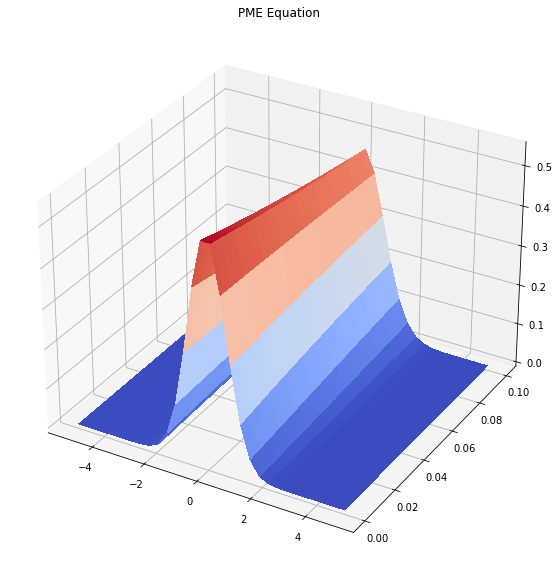

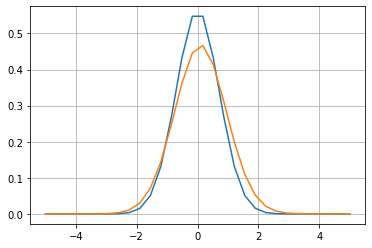

In [161]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u.T,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title('PME + nonlinear transport Equation')
plt.show()
plt.plot(x,u[:,0])
plt.plot(x,u[:,-1])
plt.grid()